In [3]:
try:
    import matplotlib.pyplot as plt
except:
    print("No se encontro matplotlib")
    raise

try:
    import pandas as pd
except:
    print("No se encontro pandas")
    raise

import numpy as np
import networkx as nx
import math

try:
    from networkx import graphviz_layout
    layout=nx.graphviz_layout

except ImportError:
    print("PyGraphviz not found; drawing with spring layout; will be slow.")
    layout=nx.spring_layout

PyGraphviz not found; drawing with spring layout; will be slow.


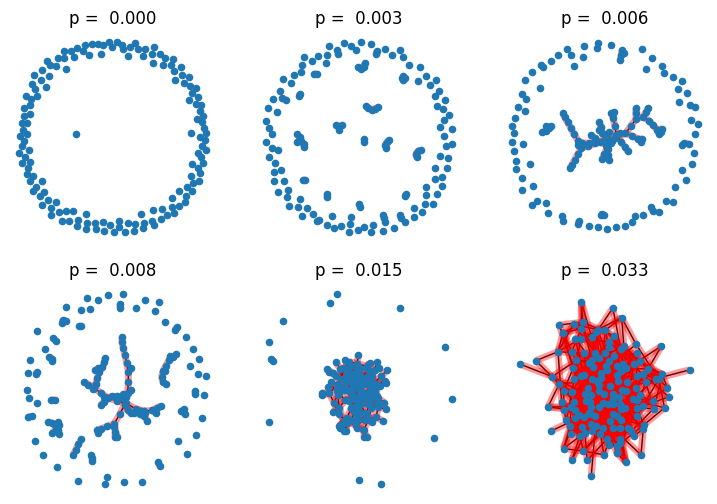

In [4]:
layout=nx.spring_layout

n=150  # 150 nodes

# p value at which giant component (of size log(n) nodes) is expected
p_giant=1.0/(n-1)

# p value at which graph is expected to become completely connected
p_conn = math.log(n)/float(n)

fig, axes = plt.subplots(2, 3, figsize=(9, 6))

axes = axes.flatten()
# the following range of p values should be close to the threshold
pvals = [0.00001, 0.003, 0.006, 0.008, 0.015, p_conn]
for i, p in enumerate(pvals):
    G = nx.binomial_graph(n,p)
    pos = layout(G)
        
    ax = axes[i]
    ax.set_title("p = %6.3f"%(p))
    nx.draw(G,pos, with_labels=False, node_size=20, ax=ax)
    
    # identify largest connected component
    connected_components = sorted(nx.connected_components(G), key=len, reverse=True)
    
    # show other connected components
    for cc in connected_components:
        Gi = G.subgraph(cc)
        if len(Gi) == 1:
            continue
        nx.draw_networkx_edges(Gi, pos, edge_color='r', width=5.0, alpha=0.4, ax=ax)
                                 
# plt.savefig("giant_component.png")
plt.show() # display

In [5]:
# net = nx.watts_strogatz_graph(10,3,0)

# pos = layout(net)
# plt.figure()
# plt.subplot(111)

# nx.draw(net,pos,node_size=10)

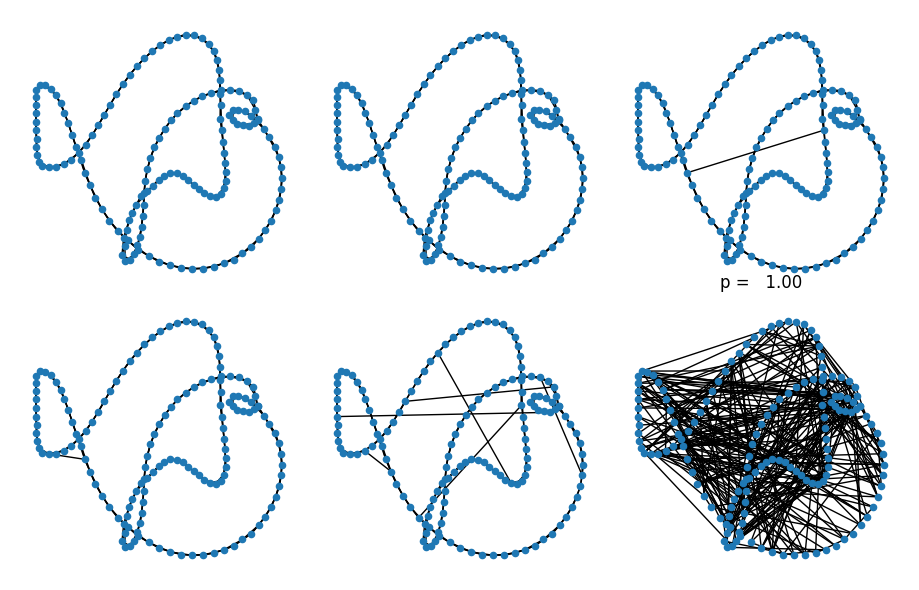

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))

axes = axes.flatten()
n = 150
k = 4
# the following range of p values should be close to the threshold
pvals = [0, 0.001, 0.002, 0.005, 0.01, 1]

G = nx.watts_strogatz_graph(n, k, 0)
pos = layout(G)
plt.subplots_adjust(left=0,right=1,bottom=0,top=0.95,wspace=0.01,hspace=0.01)
for i, p in enumerate(pvals):
    G = nx.watts_strogatz_graph(n,k,p)
    fname = f"WS_graph_{p}.graphml"
    # pos = layout(G)
    plt.title("p = %6.2f"%(p))
    nx.draw(G, pos, node_size=20, ax=axes[i])
    nx.write_graphml(G, fname)

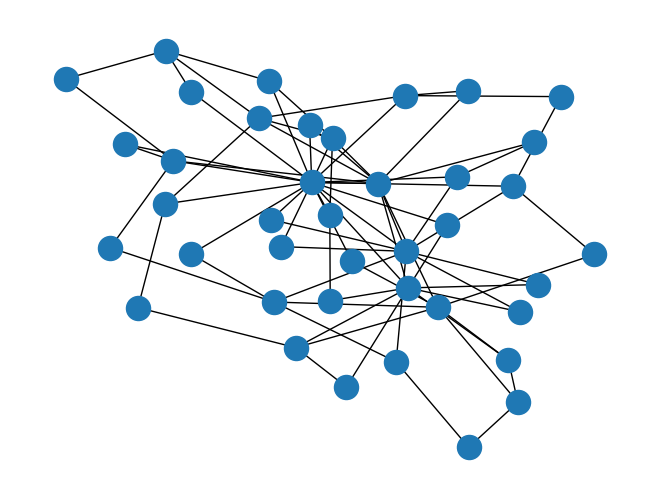

In [16]:
n = 40
m = 2
k = 4
G = nx.barabasi_albert_graph(n, m, seed=None)
nx.draw(G)